# Plotting Distributions

Now it is time to apply and expand our knowledge of plotting in matplotlib to the visualization of distributions. This is an important part of exploring datasets to understand the composition of the various fields. 

### Learning Objective

At the end of this notebook you will be able to:

    Implement binning of continuous data
    Create histograms to visualize distributions
    Build bar charts from a dataset
    Visualize 2 distributions in one chart
    Build complex and composite charts from a dataset
    Split charts using categorical variables
    
We'll be using Pandas DataFrames as the basis for these exercises as this is a usual use case while doing EDA.

We will be working with data from the Bureau of Transportation Statistics of the U.S. Department of Transportation

The specific dataset we are working with can be downloaded here:
https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr


In [1]:
import matplotlib # Imports entire matplotlib library
import matplotlib.pyplot as plt # Imports the plotting interface and gives a shortcut
import numpy as np # we will use numpy to generate the data used in our sample charts
import pandas as pd
import seaborn as sns

### What is a histogram?
It is a common chart type that is helpful in showing how values of an observations in a dataset are distributed throughout the dataset. In other words, how many observations being to each value or set of values.

Here is a simple example of 1000 random observations

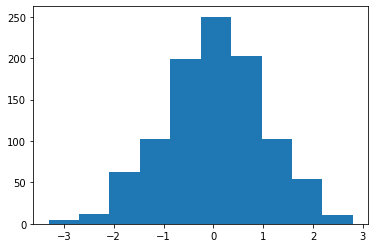

In [2]:
x = np.random.randn(1000)
plt.hist(x);

This looks like a nice bell curve which is due to the fact that the numpy randn function takes samples from a normal distribution.
We will look at a real world dataset of flight delays to see how they are distributed.

In [3]:
# Path of the file to read
flights_filepath = '../data/586855489_T_ONTIME_REPORTING_April_2020_2.csv'

# Read the file into a variable iris_data
df = pd.read_csv(flights_filepath, header=0)

# Print the first 5 rows of the data
display(df.shape)
display(df.info())



(313382, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313382 entries, 0 to 313381
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FL_DATE            313382 non-null  object 
 1   OP_UNIQUE_CARRIER  313382 non-null  object 
 2   ORIGIN_AIRPORT_ID  313382 non-null  int64  
 3   DEST_AIRPORT_ID    313382 non-null  int64  
 4   DEP_DELAY          183383 non-null  float64
 5   DEP_DELAY_NEW      183383 non-null  float64
 6   DEP_DEL15          183383 non-null  float64
 7   ARR_DELAY          183006 non-null  float64
 8   ARR_DEL15          183006 non-null  float64
 9   CANCELLED          313382 non-null  float64
 10  AIR_TIME           183006 non-null  float64
 11  DISTANCE           313382 non-null  float64
 12  Unnamed: 12        0 non-null       float64
dtypes: float64(9), int64(2), object(2)
memory usage: 31.1+ MB


None

In [4]:
df.describe().round(2)

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,Unnamed: 12
count,313382.00,313382.00,183383.00,183383.00,183383.00,183006.00,183006.00,313382.00,183006.00,313382.00,0.0
mean,12650.76,12649.46,-3.23,3.59,0.05,-13.63,0.05,0.42,103.67,737.93,NaN
std,1539.11,1539.30,26.61,25.18,0.22,29.07,0.22,0.49,63.03,510.16,NaN
min,10135.00,10135.00,-73.00,0.00,0.00,-110.00,0.00,0.00,8.00,31.00,NaN
25%,11292.00,11292.00,-10.00,0.00,0.00,-25.00,0.00,0.00,57.00,356.00,NaN
50%,12889.00,12889.00,-6.00,0.00,0.00,-17.00,0.00,0.00,88.00,611.00,NaN
75%,14057.00,14057.00,-3.00,0.00,0.00,-8.00,0.00,1.00,133.00,985.00,NaN
max,16869.00,16869.00,1553.00,1553.00,1.00,1563.00,1.00,1.00,550.00,4502.00,NaN


In [5]:
# Clean up dataframe
df.drop(axis=1,columns='Unnamed: 12', inplace=True) # drop random extra column

# Change data type for date
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313382 entries, 0 to 313381
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FL_DATE            313382 non-null  datetime64[ns]
 1   OP_UNIQUE_CARRIER  313382 non-null  object        
 2   ORIGIN_AIRPORT_ID  313382 non-null  int64         
 3   DEST_AIRPORT_ID    313382 non-null  int64         
 4   DEP_DELAY          183383 non-null  float64       
 5   DEP_DELAY_NEW      183383 non-null  float64       
 6   DEP_DEL15          183383 non-null  float64       
 7   ARR_DELAY          183006 non-null  float64       
 8   ARR_DEL15          183006 non-null  float64       
 9   CANCELLED          313382 non-null  float64       
 10  AIR_TIME           183006 non-null  float64       
 11  DISTANCE           313382 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 28.7+ MB


None

## Histograms

The histogram shows the distribution of data across the x value as split into 'bins' to group and count the observations. Bins are equally sized and span the range of x values. It is possible to specify the number of bins you would like and the bin size will be chosen by splitting the range accordingly.
The below is an easy way of showing the histogram but it is not a great visualization, as it is small and is full of chart junk.
Fortunately we can use the object orientated interface of Matplotlib to manipulate the panel by referencing the 'ax' inside the `hist()` method, which we will show next.

array([[<AxesSubplot:title={'center':'AIR_TIME'}>]], dtype=object)

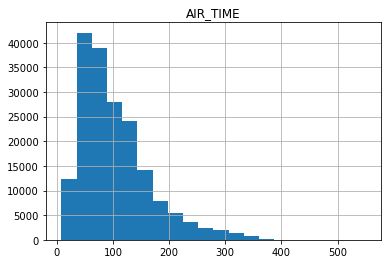

In [6]:
df.hist(column='AIR_TIME', bins=20)

In [7]:
# Here we introduce a technique for making 'chained' code more readable, understandable and editable

# Count the number of observations with flight time above 420 minutes
(
    df    # We start with our dataframe
    .loc[df['AIR_TIME'] > 420] # filter it down to rows that have flight time more than 420 mintues
    .count()['AIR_TIME']  # we count the resulting rows
)

45

In [8]:
# Note the above is equivilent to the following 
df.loc[df['AIR_TIME'] > 420].count()['AIR_TIME']

45

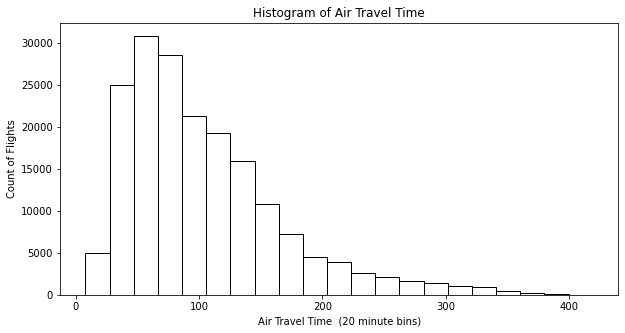

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

xmax = 420 # based on the above we can reduce the xaxis to not show the flights over 7 hours
bins = 21 # a nice number of bins based on range

(
    df
    .loc[df['AIR_TIME'] < xmax]
    .hist(ax=ax, 
          column='AIR_TIME',
          bins=bins, 
          edgecolor="black", 
          linewidth=1, color='w')
)

# These can also be set in the hist method
ax.grid(False)
ax.set_title('Histogram of Air Travel Time')
ax.set_ylabel('Count of Flights')
ax.set_xlabel(f'Air Travel Time  ({int(xmax/bins)} minute bins)');


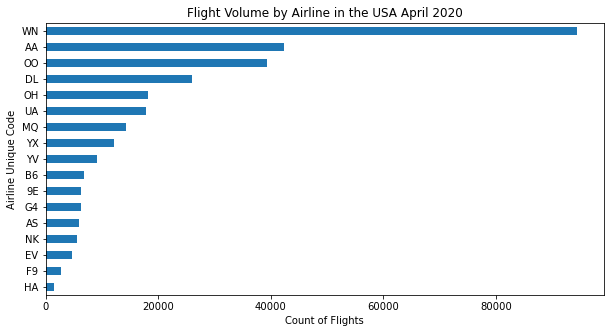

In [10]:
# Bar Chart

fig, ax = plt.subplots(figsize=(10,5))
(
    df
    .groupby('OP_UNIQUE_CARRIER') # aggregate data to level of airline
    .count()['FL_DATE'] # count the observations
    .sort_values() # sort the values in descending
    .plot.barh() # Make a bar chart based on the dataframe
)
ax.set_title('Flight Volume by Airline in the USA April 2020')

ax.set_xlabel('Count of Flights');
ax.set_ylabel('Airline Unique Code');


## Seaborn
Seaborn is built on top of Matplotlib and has some nice features for plotting distributions like drawing the kernel density estimate (KDE) plot (smoothed histogram) directly on the histogram.

We can explore different ways to display two distributions at the same time. We can determine roughly if the data behave similarly across the two dimensions.

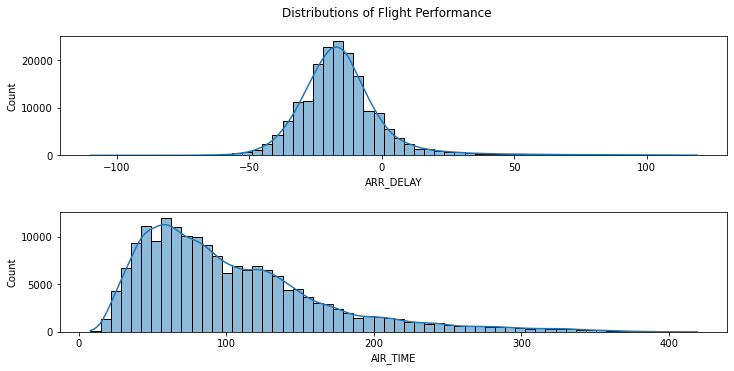

In [11]:
# As Subplots
fig, ax = plt.subplots(2,1, figsize=(10,5))
fig.tight_layout(h_pad=4)

fig.suptitle('Distributions of Flight Performance')
plt.subplots_adjust(top=0.90)

xmax = 120 # Limit our misery and ignore delays over 2 hours
bins = 60

sns.histplot(ax = ax[0], 
             data = df.loc[df['ARR_DELAY'] < xmax],
             x = 'ARR_DELAY', 
             bins = bins, kde = True)
sns.histplot(ax = ax[1], 
             data = df.loc[df['AIR_TIME'] < 420], 
             x = 'AIR_TIME', 
             bins = bins, 
             kde = True);



### Overlapping Charts
By plotting multiple charts on the single axes it is easy to compare distributions. 

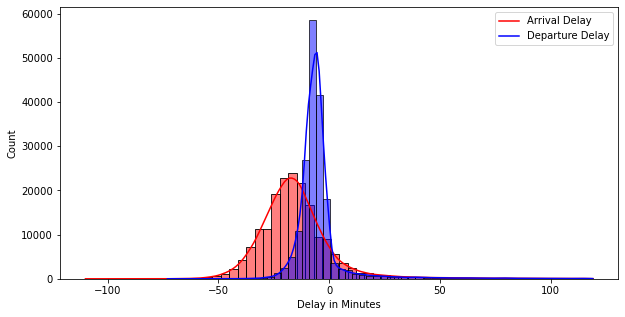

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

xmax = 120
bins = 60
sns.histplot(ax = ax,
             data = df.loc[df['ARR_DELAY'] < xmax],
             x = 'ARR_DELAY',
             bins = bins,
             kde = True, 
             color = 'r')

sns.histplot(ax = ax, 
             data = df.loc[df['DEP_DELAY'] < xmax], 
             x = 'DEP_DELAY', 
             bins = bins,
             kde = True, 
             color = 'b', 
             alpha = 0.5); # Setting the alpha creates transparency

ax.set_xlabel('Delay in Minutes')
ax.legend(['Arrival Delay', 'Departure Delay']);

## Composite Charts
Seaborn has a number of composite chart types that allow the comparison of multiple data columns using a combination of charts. 

For example we can compare the distributions of two columns with the jointplot which is a builtin Seaborn plot type. It shows the histograms for each column and a addition chart that displays the distribution of observations across the two dimensions at the same time, such as a scatter plot.



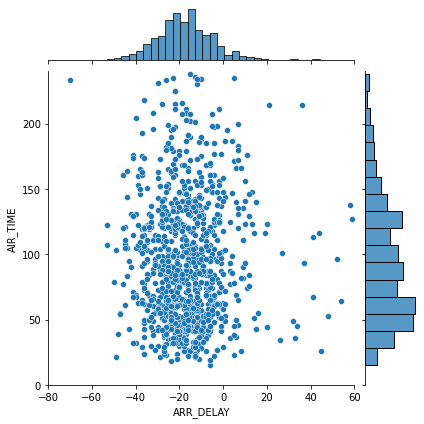

In [13]:
df_plot = (
            df
            .loc[df['ARR_DELAY'] < 80]
            .loc[df['AIR_TIME'] < 240]
            .sample(n=1000) # take a small sample of the data for purpose of visualization
            )

sns.jointplot(data = df_plot, 
                  x = 'ARR_DELAY', 
                  xlim = (-80,60), 
                  y = 'AIR_TIME', 
                  ylim = (0,240), 
                  kind = 'scatter');

## Figure Level Functions

We have previously introduced the two ways Matplotlib creates figures, either MATLAB or Object-oriented interface. In both of these interfaces there are methods that control the figure (`fig.`)  and other methods that control the axes (`ax.`).
Seaborn has some plot functions that work in the same way in that they create axes level objects that are the same as matplotlib charts. 

When using Seaborns's complex charts, Seaborn will generates the figure (grid) and axes it needs. To customize aspects of this complex chart it is necessary to get a hold of these objects and apply the relevant functions to them.



As we did in the first notebook we can use the `type()`function to get an idea of what objects we are working with

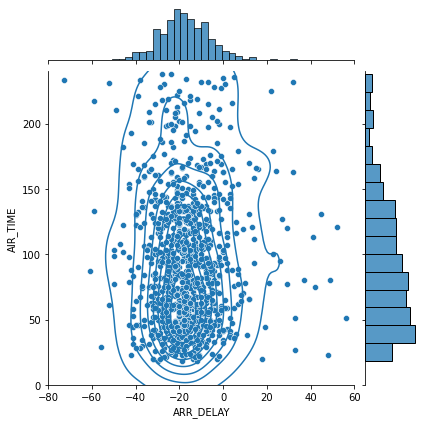

In [14]:
# KDE functions can be quite CPU intensive for large datasets
df_plot = (
            df
            .loc[df['ARR_DELAY'] < 80]
            .loc[df['AIR_TIME'] < 240]
            .sample(n=1000))

df_plot["WEEKDAY"] = df_plot["FL_DATE"].apply(lambda x: x.weekday())


grid = sns.jointplot(data = df_plot, 
                      x = 'ARR_DELAY', 
                      xlim = (-80,60), 
                      y = 'AIR_TIME', 
                      ylim = (0,240), 
                      kind = 'scatter')

grid.plot_joint(sns.kdeplot) # We can add an additional chart to the joint axes of the grid

Here is a list of the composite chart type objects from Seaborn:  
PairGrid, FacetGrid, JointGrid

Note that `jointplot()` created a JointGrid object.

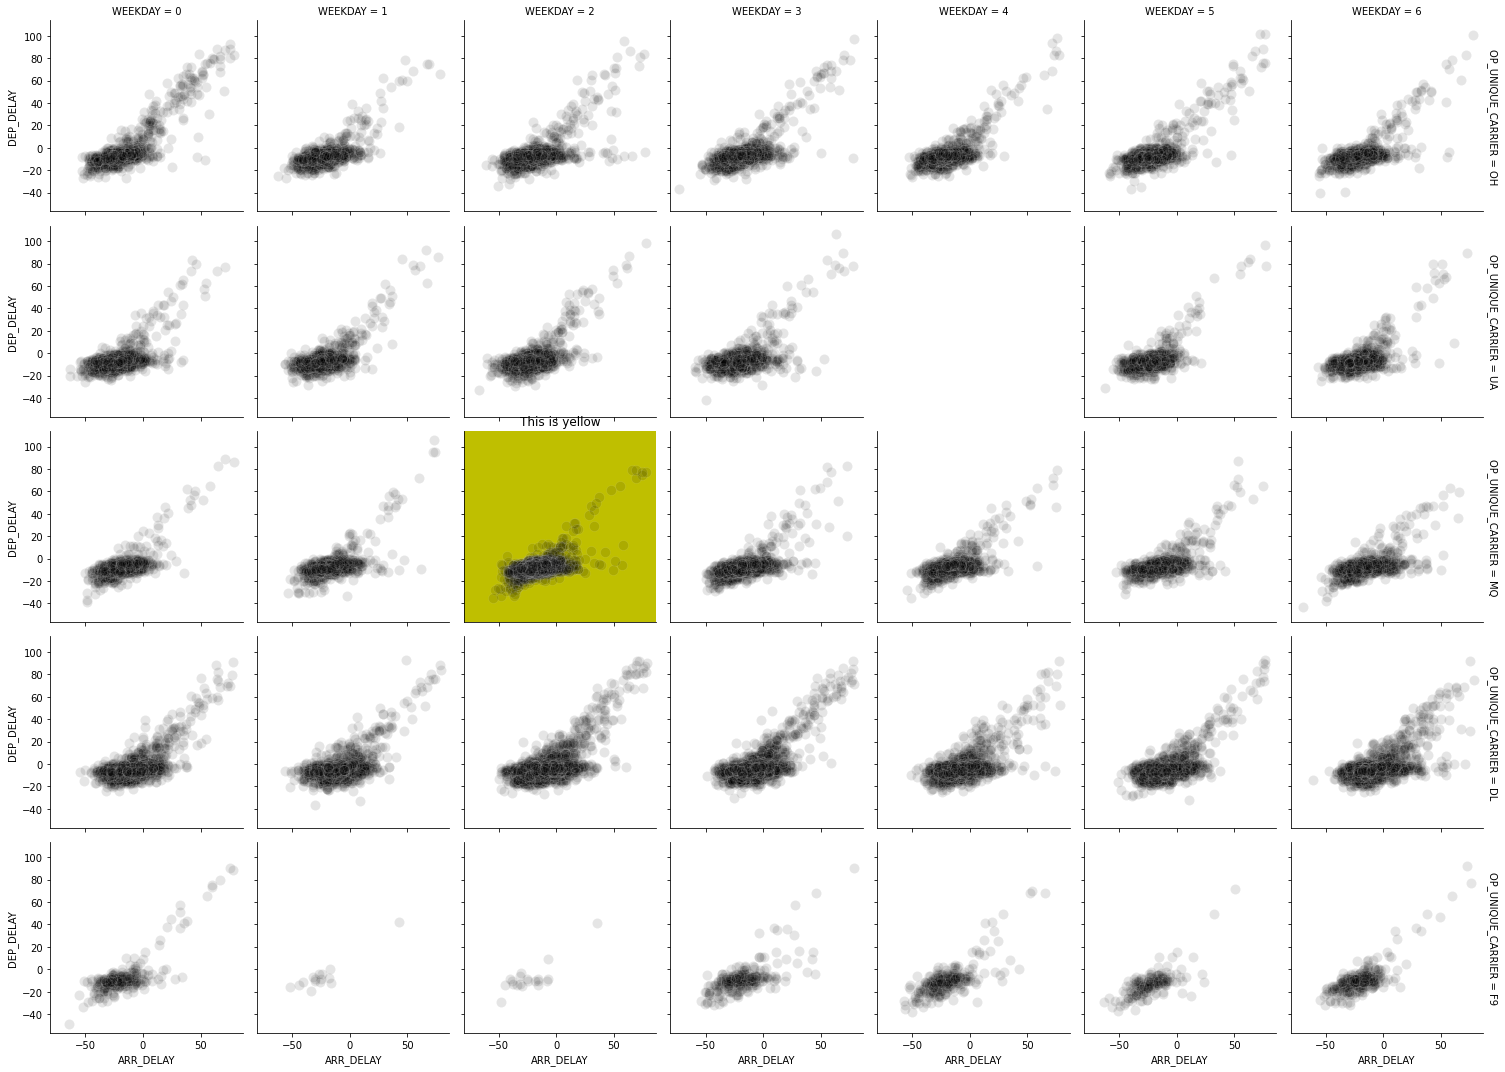

In [15]:
# Set up dataframe
df_plot = (
            df
            .loc[df['ARR_DELAY'] < 80]
            .loc[df['AIR_TIME'] < 240]
            .loc[df['OP_UNIQUE_CARRIER'].isin(['UA', 'OH', 'OO' 'AA', 'DV', 'MQ', 'DL', 'F9'])] # List of Carriers we want to view in more detail
)
df_plot["WEEKDAY"] = df_plot["FL_DATE"].apply(lambda x: x.weekday()) # add a category for day of week

# Create a grid object with columns and rows that split based on categories
grid = sns.FacetGrid(df_plot,
                     row = 'OP_UNIQUE_CARRIER',
                     col = 'WEEKDAY',
                     despine = True, # Removes the top and left axis of the subplots
                     margin_titles = True); # Displays row and column titles only on margins instead of on each axes

# Fill the grid with subplots
grid.map(sns.scatterplot, # Fill with scatterplots
         'ARR_DELAY', # x-axis
         'DEP_DELAY', # y-axis
         color = 'k', # color things black 
         s = 100, # set the size of the dots
         alpha = 0.1) # set the transparency           

ax1 = grid.axes_dict[('UA', 4)] # We can get ahold of the axes object to work with it directly by referencing the combination of row and column values
ax1.set_visible(False) # For some reason hide this plot

ax2 = grid.axes_dict[('MQ', 2)]
ax2.set_facecolor('y') # Change background color for this 'interesting' chart
ax2.set_title('This is yellow'); # Just in case you missed it


The above is a deconstruction of the facetgrid. Using the built in pairplot and other seaborn functions similar results can be gained without so much manual customization.

## Next Steps
We can use the groupby function to aggregate and explore at a metric level.

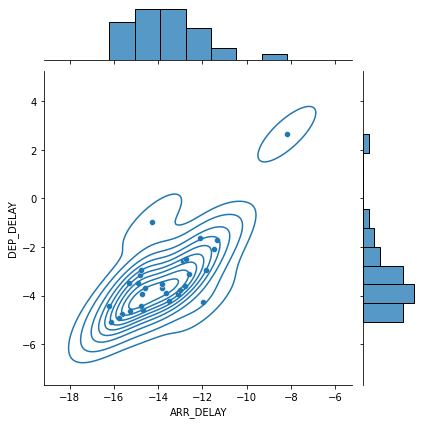

In [16]:
# We can also aggregate the data before plotting

df_plot_2 = df.groupby(by='FL_DATE').mean() # Calculate average values for each Airline
g = sns.jointplot(data = df_plot_2, 
              x = 'ARR_DELAY', 
              y = 'DEP_DELAY',
              kind = 'scatter')
g.plot_joint(sns.kdeplot)

In [17]:
# We can view the table 
(
    df_plot_2
    .sort_values(by='ARR_DELAY')
    .round(2)
)

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE
FL_DATE,,,,,,,,,,
2020-04-27,12626.29,12627.70,-4.44,2.27,0.03,-16.20,0.03,0.37,98.54,713.94
2020-04-05,12669.31,12670.66,-5.09,2.54,0.04,-16.15,0.03,0.47,109.76,775.84
2020-04-11,12667.48,12665.23,-4.93,2.61,0.03,-15.78,0.03,0.41,106.95,755.74
2020-04-10,12648.70,12645.93,-4.76,2.57,0.03,-15.62,0.03,0.41,103.42,718.55
2020-04-26,12622.77,12629.62,-3.48,3.06,0.04,-15.31,0.03,0.36,100.32,719.78
2020-04-07,12656.84,12654.36,-4.65,2.52,0.04,-15.29,0.04,0.47,107.08,754.20
2020-04-29,12631.50,12632.84,-3.46,2.91,0.04,-14.90,0.03,0.36,98.40,717.35
2020-04-25,12665.79,12657.84,-3.17,3.31,0.05,-14.81,0.04,0.36,103.14,722.96
2020-04-21,12630.80,12635.44,-4.41,2.30,0.03,-14.78,0.03,0.39,99.39,712.31


### Exercise
Are the other relationships that could be explored?

1. Use Bar charts to display the airlines based on one aggregated measure
2. Build multiple bar charts in either subplots or a single panel to explore how airlines perform across a few metrics